In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d omkargurav/face-mask-dataset

100% 163M/163M [00:08<00:00, 20.7MB/s]
100% 163M/163M [00:08<00:00, 20.4MB/s]


In [3]:
import zipfile
zip_ref=zipfile.ZipFile('/content/face-mask-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
# importing libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [5]:
with_mask_files=os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])

['with_mask_1460.jpg', 'with_mask_1212.jpg', 'with_mask_3112.jpg', 'with_mask_3526.jpg', 'with_mask_498.jpg']


In [6]:
without_mask_files=os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])

['without_mask_3637.jpg', 'without_mask_1213.jpg', 'without_mask_2409.jpg', 'without_mask_2869.jpg', 'without_mask_755.jpg']


In [8]:
len(with_mask_files)

3725

In [9]:
len(without_mask_files)

3828

In [10]:
# creating labels
# with mask----> 1
# without mask---> 0
with_mask_labels=[1]*len(with_mask_files)
without_mask_labels=[0]*len(without_mask_files)

In [14]:
labels=with_mask_labels+without_mask_labels

In [15]:
print(len(labels))

7553


In [16]:
# displaying the images


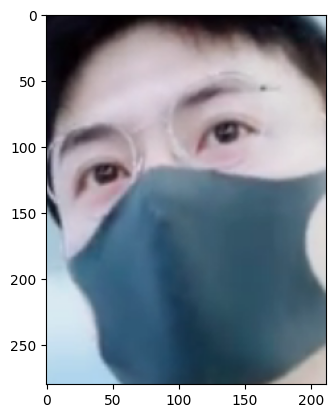

In [19]:
# displaying with mask images
img_mask=mpimg.imread('/content/data/with_mask/with_mask_1212.jpg')
plt.imshow(img_mask)
plt.show()

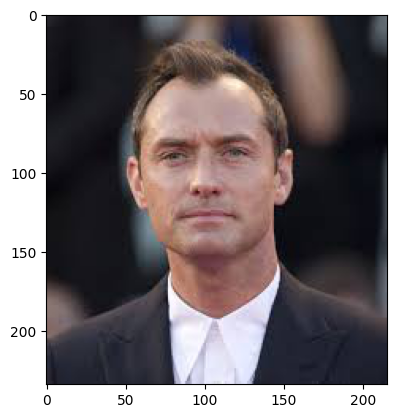

In [21]:
# displaying without mask images
img_nomask=mpimg.imread('/content/data/without_mask/without_mask_2869.jpg')
plt.imshow(img_nomask)
plt.show()

In [22]:
# Image processing


In [23]:
# 1. Resize the image
# 2. Convert the image to numpy arrays

In [27]:
# convert the images to numpy arrays
with_mask_path='/content/data/with_mask/'

data=[]

for img_file in with_mask_files:
  image=Image.open(with_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)




  without_mask_path='/content/data/without_mask/'



for img_file in without_mask_files:
  image=Image.open(without_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [28]:
len(data)

7553

In [29]:
type(data)

list

In [30]:
data[0].shape

(128, 128, 3)

In [31]:
# converting image list to numpy arrays
X=np.array(data)
y=np.array(labels)

In [32]:
X.shape

(7553, 128, 128, 3)

In [33]:
y.shape

(7553,)

In [34]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [35]:
X_train.shape

(5060, 128, 128, 3)

In [36]:
print(X_train.shape,X_test.shape)

(5060, 128, 128, 3) (2493, 128, 128, 3)


In [38]:
# scaling the data
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [39]:
# Building a CNN

In [40]:
import tensorflow as tf
from tensorflow import keras


In [41]:
from keras.api._v2.keras import activations
num_of_classes=2
model=keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(2,2))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))


In [42]:
# compile the model
model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [43]:
# training the NN
history=model.fit(X_train_scaled,y_train,validation_split=0.1,epochs=5)

Epoch 1/5
143/143 [==============================] - 14s 21ms/step - loss: 0.5640 - accuracy: 0.7077 - val_loss: 0.2971 - val_accuracy: 0.8794
Epoch 2/5
143/143 [==============================] - 2s 17ms/step - loss: 0.3096 - accuracy: 0.8768 - val_loss: 0.2370 - val_accuracy: 0.8933
Epoch 3/5
143/143 [==============================] - 2s 17ms/step - loss: 0.2542 - accuracy: 0.8972 - val_loss: 0.2387 - val_accuracy: 0.9111
Epoch 4/5
143/143 [==============================] - 2s 16ms/step - loss: 0.2166 - accuracy: 0.9126 - val_loss: 0.2238 - val_accuracy: 0.9209
Epoch 5/5
143/143 [==============================] - 2s 16ms/step - loss: 0.1904 - accuracy: 0.9286 - val_loss: 0.2128 - val_accuracy: 0.9209


In [46]:
# Model Evaluation
loss,accuracy=model.evaluate(X_test_scaled,y_test)
print('Test accuraacy=',accuracy)

78/78 [==============================] - 1s 7ms/step - loss: 0.2082 - accuracy: 0.9097
Test accuraacy= 0.909747302532196


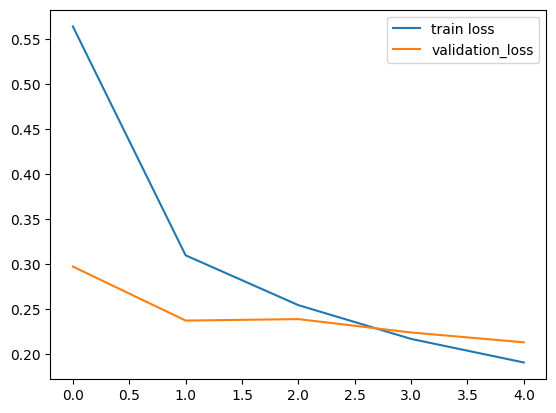

In [49]:


# plot the loss value
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='validation_loss')
plt.legend()
plt.show()

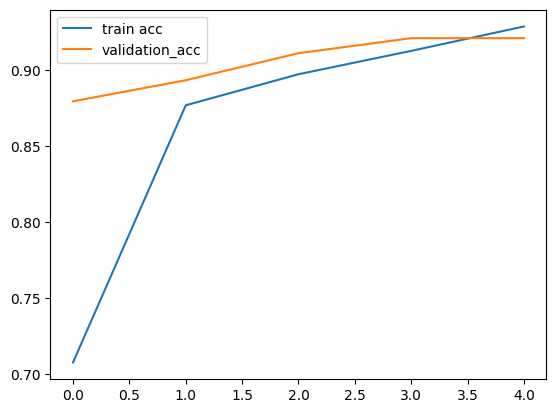

In [50]:
# plot the accuracy value
plt.plot(history.history['accuracy'],label='train acc')
plt.plot(history.history['val_accuracy'],label='validation_acc')
plt.legend()
plt.show()

In [52]:
# Making  a predictive system
input_image_path=input('Enter the path of the image to be predicted:')

input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize=cv2.resize(input_image,(128,128))
input_image_scaled=input_image_resize/255
input_image_reshaped=np.reshape(input_image_scaled,[1,128,128,3])
input_prediction=model.predict(input_image_reshaped)
print(input_prediction)

input_pred_label=np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label==1:
  print('The person in the image is wearing a mask')
else:
  print("The person in the image is not wearing a mask")